In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 8)

In [176]:
df_domclick = pd.read_csv("Краснодар_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1923 non-null   int64  
 1   region                         1923 non-null   object 
 2   address                        1923 non-null   object 
 3   latitude                       1923 non-null   float64
 4   longitude                      1923 non-null   float64
 5   price                          1923 non-null   int64  
 6   house_floors                   1923 non-null   int64  
 7   house_buildYear                1923 non-null   object 
 8   house_ceilingHeight            1923 non-null   object 
 9   house_hasGarbageDisposer       1123 non-null   object 
 10  house_liftsFreight             1063 non-null   float64
 11  house_liftsPassenger           1108 non-null   float64
 12  house_wallType                 1877 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1848810690,Краснодар,"Конгрессная улица, 33к1",45.108055,38.956969,3520000,25,2021,undefined,False,0.0,NaN,Монолитно-кирпичный,43,NaN,10798.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,46.0,12.0,0.0,19,undefined,undefined,0,False,undefined,NaN
1,1848808394,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4625000,19,2018,undefined,False,0.0,NaN,Монолитный,33.6,NaN,21679.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,75.0,0.0,0.0,15,undefined,undefined,0,False,undefined,NaN
2,1848804336,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4620000,19,2018,undefined,False,0.0,NaN,Монолитный,33.6,NaN,21679.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,72.0,0.0,0.0,18,undefined,undefined,0,False,undefined,NaN
3,1848803762,Краснодар,"улица Лётчика Позднякова, 2к4",45.098652,39.059961,2590000,9,2019,undefined,False,0.0,1.0,Кирпичный,2344,597.6,4358.7,NaN,NaN,NaN,NaN,NaN,3,NaN,3,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,37.0,0.0,0.0,5,undefined,undefined,0,False,undefined,NaN
4,1848797362,Краснодар,"Заполярная улица, 39к1",45.072535,38.905047,5400000,16,2018,undefined,False,0.0,NaN,Монолитно-кирпичный,37,NaN,3256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,75.5,0.0,0.0,10,undefined,undefined,0,False,undefined,NaN


In [177]:
b
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1923 non-null   int64  
 1   region                         1923 non-null   object 
 2   address                        1923 non-null   object 
 3   latitude                       1923 non-null   float64
 4   longitude                      1923 non-null   float64
 5   price                          1923 non-null   int64  
 6   house_floors                   1923 non-null   int64  
 7   house_buildYear                1923 non-null   object 
 8   house_ceilingHeight            1923 non-null   object 
 9   house_hasGarbageDisposer       1123 non-null   object 
 10  house_liftsFreight             1063 non-null   float64
 11  house_liftsPassenger           1108 non-null   float64
 12  house_wallType                 1877 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1848810690,Краснодар,"Конгрессная улица, 33к1",45.108055,38.956969,3520000,25,2021,undefined,False,0.0,NaN,Монолитно-кирпичный,43,NaN,10798.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,46.0,12.0,0.0,19,undefined,undefined,0,False,undefined,NaN
1,1848808394,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4625000,19,2018,undefined,False,0.0,NaN,Монолитный,33.6,NaN,21679.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,75.0,0.0,0.0,15,undefined,undefined,0,False,undefined,NaN
2,1848804336,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4620000,19,2018,undefined,False,0.0,NaN,Монолитный,33.6,NaN,21679.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,72.0,0.0,0.0,18,undefined,undefined,0,False,undefined,NaN
3,1848803762,Краснодар,"улица Лётчика Позднякова, 2к4",45.098652,39.059961,2590000,9,2019,undefined,False,0.0,1.0,Кирпичный,2344,597.6,4358.7,NaN,NaN,NaN,NaN,NaN,3,NaN,3,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,37.0,0.0,0.0,5,undefined,undefined,0,False,undefined,NaN
4,1848797362,Краснодар,"Заполярная улица, 39к1",45.072535,38.905047,5400000,16,2018,undefined,False,0.0,NaN,Монолитно-кирпичный,37,NaN,3256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,75.5,0.0,0.0,10,undefined,undefined,0,False,undefined,NaN


In [178]:
df_domclick.replace('undefined', np.nan, inplace=True)
df_domclick['objectInfo_kitchenArea'].replace(0, np.nan, inplace=True)
df_domclick['objectInfo_livingArea'].replace(0, np.nan, inplace=True)

In [179]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1923 non-null   int64  
 1   region                         1923 non-null   object 
 2   address                        1923 non-null   object 
 3   latitude                       1923 non-null   float64
 4   longitude                      1923 non-null   float64
 5   price                          1923 non-null   int64  
 6   house_floors                   1923 non-null   int64  
 7   house_buildYear                1902 non-null   object 
 8   house_ceilingHeight            227 non-null    object 
 9   house_hasGarbageDisposer       1123 non-null   object 
 10  house_liftsFreight             1063 non-null   float64
 11  house_liftsPassenger           1108 non-null   float64
 12  house_wallType                 1866 non-null   o

<Axes: xlabel='house_buildYear', ylabel='count'>

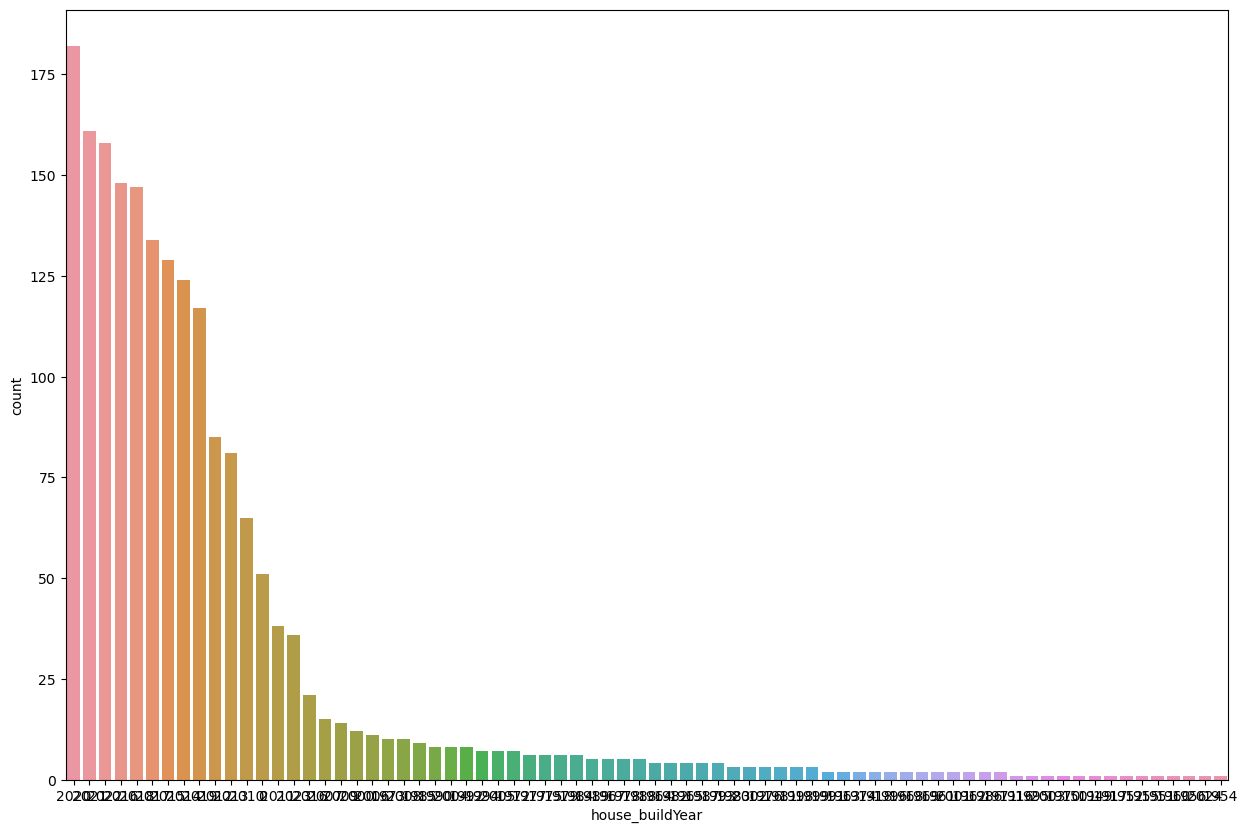

In [267]:
sns.countplot(data=df_domclick, x='house_buildYear', order = df_domclick['house_buildYear'].value_counts().index, orient = 'v')

In [181]:
df_domclick['house_buildYear'].dropna().median()

2016.0

In [182]:
df_domclick['house_buildYear'].fillna(value = 2016, inplace = True)

<Axes: xlabel='house_wallType', ylabel='count'>

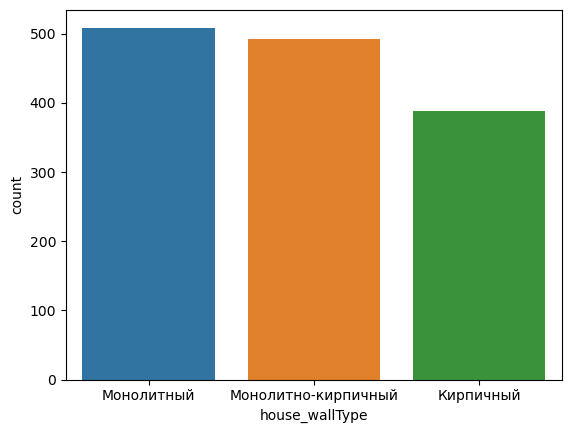

In [183]:
sns.countplot(data=df_domclick, x='house_wallType', order = df_domclick['house_wallType'].value_counts().index[:3])

In [184]:
df_domclick['house_wallType'].fillna(value = 'Монолитный', inplace = True)

<Axes: xlabel='house_areaCommonPropery', ylabel='count'>

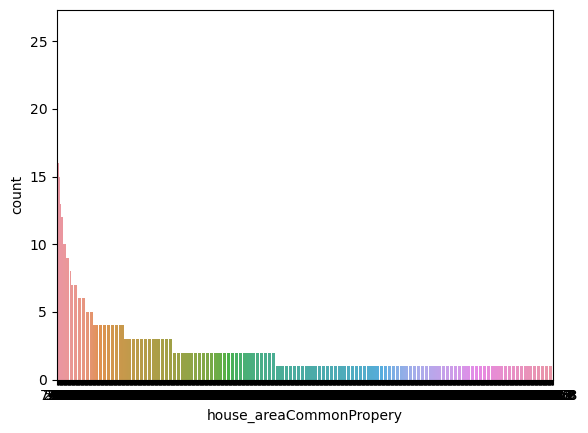

In [185]:
sns.countplot(data=df_domclick, x='house_areaCommonPropery', order = df_domclick['house_areaCommonPropery'].value_counts().index)

In [186]:
df_domclick['house_areaCommonPropery'].dropna().median()

159.9

In [187]:
df_domclick['house_areaCommonPropery'].fillna(value = 159.9, inplace = True)

In [188]:
df_domclick['house_areaResidential'].dropna().median() 

12733.4

In [189]:
df_domclick['house_areaResidential'].fillna(value = 12733.4, inplace = True)

<Axes: xlabel='house_floorType', ylabel='count'>

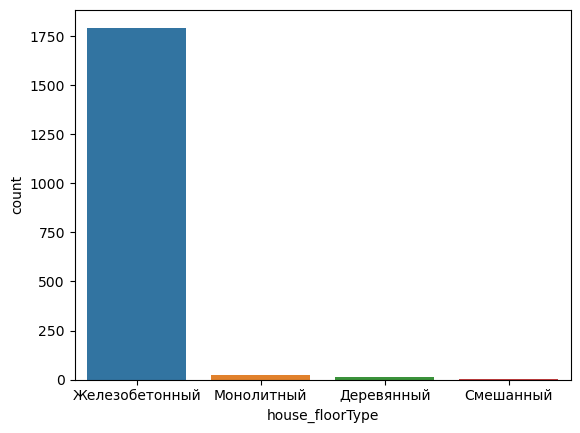

In [190]:
sns.countplot(data=df_domclick, x='house_floorType', order = df_domclick['house_floorType'].value_counts().index[:4])

In [1]:
sns.countplot(data=df_domclick, x='objectInfo_renovation')

NameError: name 'sns' is not defined

In [191]:
df_domclick['house_floorType'].fillna(value = 'Железобетонный', inplace = True)

<Axes: xlabel='saleType', ylabel='count'>

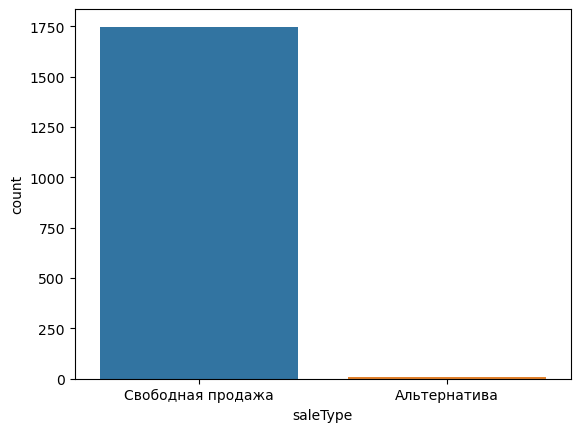

In [192]:
sns.countplot(data=df_domclick, x='saleType', order = df_domclick['saleType'].value_counts().index[:4])

In [193]:
df_domclick['saleType'].fillna(value = 'Свободная продажа', inplace = True)

In [194]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1923 non-null   int64  
 1   region                         1923 non-null   object 
 2   address                        1923 non-null   object 
 3   latitude                       1923 non-null   float64
 4   longitude                      1923 non-null   float64
 5   price                          1923 non-null   int64  
 6   house_floors                   1923 non-null   int64  
 7   house_buildYear                1923 non-null   object 
 8   house_ceilingHeight            227 non-null    object 
 9   house_hasGarbageDisposer       1123 non-null   object 
 10  house_liftsFreight             1063 non-null   float64
 11  house_liftsPassenger           1108 non-null   float64
 12  house_wallType                 1923 non-null   o

In [210]:
clean_columns = ['id', 'region', 'address', 'latitude', 'longitude', 'price', 'house_floorType',
                                'house_floors', 'house_buildYear', 'house_wallType', 'saleType',
                                'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_rooms',
                                'objectInfo_area', 'objectInfo_floor', 'objectInfo_balconies']
df_domclick_clean = df_domclick[clean_columns]
df_domclick_clean.info()
df_domclick_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1923 non-null   int64  
 1   region                   1923 non-null   object 
 2   address                  1923 non-null   object 
 3   latitude                 1923 non-null   float64
 4   longitude                1923 non-null   float64
 5   price                    1923 non-null   int64  
 6   house_floorType          1923 non-null   object 
 7   house_floors             1923 non-null   int64  
 8   house_buildYear          1923 non-null   object 
 9   house_wallType           1923 non-null   object 
 10  saleType                 1923 non-null   object 
 11  house_areaCommonPropery  1923 non-null   object 
 12  house_areaResidential    1923 non-null   object 
 13  objectInfo_rooms         1923 non-null   int64  
 14  objectInfo_area         

,id,region,address,latitude,longitude,price,house_floorType,house_floors,house_buildYear,house_wallType,saleType,house_areaCommonPropery,house_areaResidential,objectInfo_rooms,objectInfo_area,objectInfo_floor,objectInfo_balconies
0,1848810690,Краснодар,"Конгрессная улица, 33к1",45.108055,38.956969,3520000,Железобетонный,25,2021,Монолитно-кирпичный,Свободная продажа,43,10798.1,1,46.0,19,0
1,1848808394,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4625000,Железобетонный,19,2018,Монолитный,Свободная продажа,33.6,21679.6,2,75.0,15,0
2,1848804336,Краснодар,"Домбайская улица, 63",45.073165,39.038456,4620000,Железобетонный,19,2018,Монолитный,Свободная продажа,33.6,21679.6,2,72.0,18,0
3,1848803762,Краснодар,"улица Лётчика Позднякова, 2к4",45.098652,39.059961,2590000,Железобетонный,9,2019,Кирпичный,Свободная продажа,2344,4358.7,1,37.0,5,0
4,1848797362,Краснодар,"Заполярная улица, 39к1",45.072535,38.905047,5400000,Железобетонный,16,2018,Монолитно-кирпичный,Свободная продажа,37,3256,2,75.5,10,0


In [195]:
df_cian = pd.read_csv("cian/data_home_Krasnodar.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35792 entries, 0 to 35791
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 35792 non-null  object
 1   price                35792 non-null  object
 2   price_for_metr       35792 non-null  object
 3   floor_object         35792 non-null  int64 
 4   total_floors         35792 non-null  int64 
 5   type_of_home         35792 non-null  object
 6   square_home          35792 non-null  object
 7   live_square          35792 non-null  object
 8   kitchen_square       35792 non-null  object
 9   height_ceiling       35792 non-null  object
 10  bathroom             35792 non-null  object
 11  balcony              35792 non-null  object
 12  repair               35792 non-null  object
 13  yer_home             35792 non-null  object
 14  garbage_chute        35792 non-null  object
 15  type_home            35792 non-null  object
 16  type

In [196]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1-комн. квартира,1 250 000 ₽,34 722 ₽/м²,1,1,Вторичка,36,19,12,3 м,1 совмещенный,Null,Косметический,Null,Null,Кирпичный,Null,Null,Null,Null,Null,Null,Null,"Краснодарский край, Краснодар, Западный, мкр. ...",https://krasnodar.cian.ru/sale/flat/293913865/
1,Студия,1 399 999 ₽,48 276 ₽/м²,1,7,Вторичка,29,20,5,"2,7 м",Null,Null,Евроремонт,2013,Null,Кирпичный,Железобетонные,1,Центральное,Нет,Null,Null,Null,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/293380164/
2,Апартаменты-студия,1 400 000 ₽,61 404 ₽/м²,1,16,Вторичка Апартаменты,"22,8",Null,Null,Null,1 раздельный,1 балкон,Евроремонт,2020,Null,Монолитный,Железобетонные,2,Центральное,Нет,Null,Null,"1 пассажирский, 1 грузовой","Адыгея респ., Тахтамукайский район, Старобжего...",https://maykop.cian.ru/sale/flat/290305472/
3,1-комн. квартира,1 300 000 ₽,65 657 ₽/м²,2,2,Вторичка,"19,8","13,1",2,"4,5 м",Null,Null,Null,1917,Null,Кирпичный,Железобетонные,1,Печь,Нет,Центральное,Null,Null,"Краснодарский край, Краснодар, Центральный, мк...",https://krasnodar.cian.ru/sale/flat/293596185/
4,Апартаменты-студия,1 400 000 ₽,66 351 ₽/м²,1,3,Вторичка Апартаменты,"21,1","11,1",5,"2,7 м",1 совмещенный,Null,Косметический,2012,Null,Кирпичный,Железобетонные,3,Автономная котельная,Нет,Null,Null,Null,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/291968418/


In [197]:
df_cian.drop_duplicates(keep = 'last', inplace = True)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 35791
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 13524 non-null  object
 1   price                13524 non-null  object
 2   price_for_metr       13524 non-null  object
 3   floor_object         13524 non-null  int64 
 4   total_floors         13524 non-null  int64 
 5   type_of_home         13524 non-null  object
 6   square_home          13524 non-null  object
 7   live_square          13524 non-null  object
 8   kitchen_square       13524 non-null  object
 9   height_ceiling       13524 non-null  object
 10  bathroom             13524 non-null  object
 11  balcony              13524 non-null  object
 12  repair               13524 non-null  object
 13  yer_home             13524 non-null  object
 14  garbage_chute        13524 non-null  object
 15  type_home            13524 non-null  object
 16  type

In [198]:
df_cian.replace('Null', np.nan, inplace=True)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 35791
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 13524 non-null  object
 1   price                13524 non-null  object
 2   price_for_metr       13524 non-null  object
 3   floor_object         13524 non-null  int64 
 4   total_floors         13524 non-null  int64 
 5   type_of_home         13524 non-null  object
 6   square_home          13524 non-null  object
 7   live_square          8963 non-null   object
 8   kitchen_square       9845 non-null   object
 9   height_ceiling       6701 non-null   object
 10  bathroom             9533 non-null   object
 11  balcony              8365 non-null   object
 12  repair               9372 non-null   object
 13  yer_home             9276 non-null   object
 14  garbage_chute        1623 non-null   object
 15  type_home            11115 non-null  object
 16  type

In [199]:
df_cian.replace('Нет информации', np.nan, inplace=True)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 35791
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 13524 non-null  object
 1   price                13524 non-null  object
 2   price_for_metr       13524 non-null  object
 3   floor_object         13524 non-null  int64 
 4   total_floors         13524 non-null  int64 
 5   type_of_home         13524 non-null  object
 6   square_home          13524 non-null  object
 7   live_square          8963 non-null   object
 8   kitchen_square       9845 non-null   object
 9   height_ceiling       6701 non-null   object
 10  bathroom             9533 non-null   object
 11  balcony              8365 non-null   object
 12  repair               9372 non-null   object
 13  yer_home             9276 non-null   object
 14  garbage_chute        1623 non-null   object
 15  type_home            11115 non-null  object
 16  type

<Axes: xlabel='type_home', ylabel='count'>

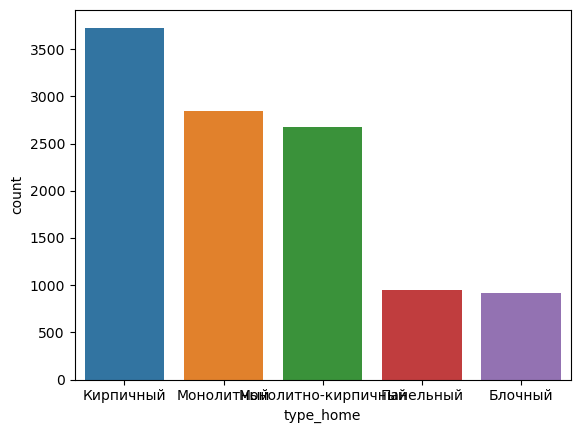

In [200]:
sns.countplot(data=df_cian, x='type_home', order = df_cian['type_home'].value_counts().index[:5])

In [201]:
df_cian['type_home'].fillna(value = 'Кирпичный', inplace = True)

<Axes: xlabel='type_of_overlap', ylabel='count'>

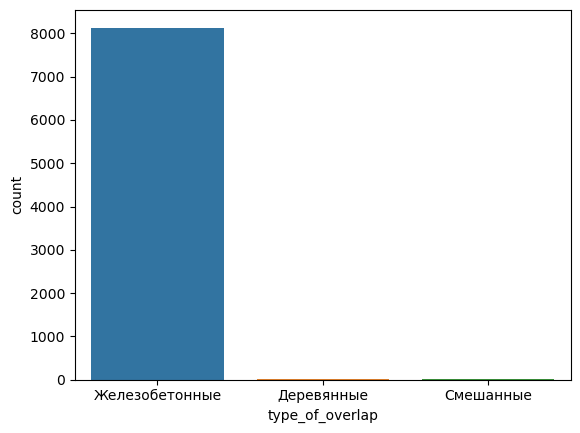

In [202]:
sns.countplot(data=df_cian, x='type_of_overlap', order = df_cian['type_of_overlap'].value_counts().index[:5])

In [203]:
df_cian['type_of_overlap'].fillna(value = 'Железобетонные', inplace = True)

<Axes: xlabel='number_of_elevators', ylabel='count'>

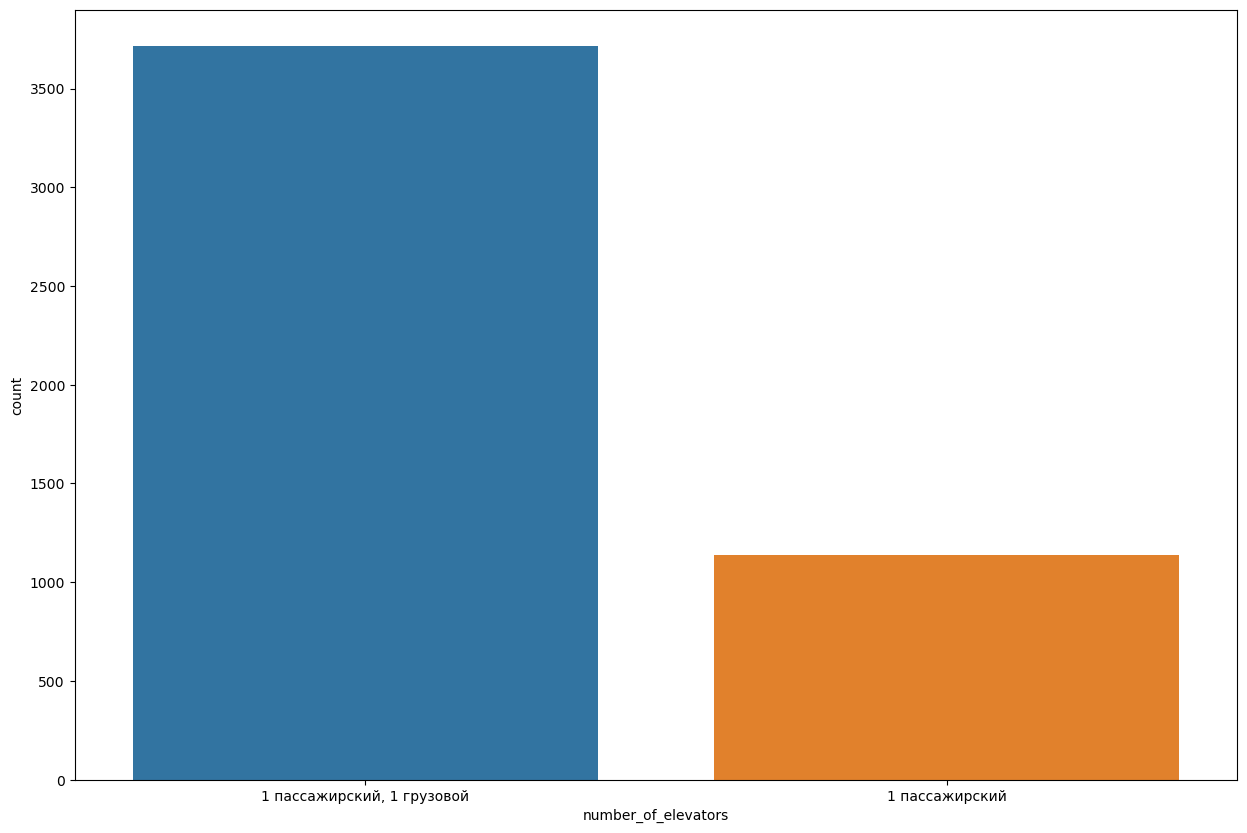

In [269]:
sns.countplot(data=df_cian, x='number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index[:2])

In [211]:
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 35791
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 13524 non-null  object
 1   price                13524 non-null  object
 2   price_for_metr       13524 non-null  object
 3   floor_object         13524 non-null  int64 
 4   total_floors         13524 non-null  int64 
 5   type_of_home         13524 non-null  object
 6   square_home          13524 non-null  object
 7   live_square          8963 non-null   object
 8   kitchen_square       9845 non-null   object
 9   height_ceiling       6701 non-null   object
 10  bathroom             9533 non-null   object
 11  balcony              8365 non-null   object
 12  repair               9372 non-null   object
 13  yer_home             9276 non-null   object
 14  garbage_chute        1623 non-null   object
 15  type_home            13524 non-null  object
 16  type

In [239]:
clean_columns_cian = ['name', 'price', 'price_for_metr', 'floor_object', 'total_floors', 'type_of_home', 'square_home',
                                'type_home', 'type_of_overlap', 'address']
df_cian_clean = df_cian[clean_columns_cian]
df_cian_clean.info()
df_cian_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 35791
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             13524 non-null  object
 1   price            13524 non-null  object
 2   price_for_metr   13524 non-null  object
 3   floor_object     13524 non-null  int64 
 4   total_floors     13524 non-null  int64 
 5   type_of_home     13524 non-null  object
 6   square_home      13524 non-null  object
 7   type_home        13524 non-null  object
 8   type_of_overlap  13524 non-null  object
 9   address          13524 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,type_home,type_of_overlap,address
0,1-комн. квартира,1 250 000 ₽,34 722 ₽/м²,1,1,Вторичка,36,Кирпичный,Железобетонные,"Краснодарский край, Краснодар, Западный, мкр. ..."
1,Студия,1 399 999 ₽,48 276 ₽/м²,1,7,Вторичка,29,Кирпичный,Железобетонные,"Краснодарский край, Краснодар, Прикубанский, м..."
2,Апартаменты-студия,1 400 000 ₽,61 404 ₽/м²,1,16,Вторичка Апартаменты,"22,8",Монолитный,Железобетонные,"Адыгея респ., Тахтамукайский район, Старобжего..."
3,1-комн. квартира,1 300 000 ₽,65 657 ₽/м²,2,2,Вторичка,"19,8",Кирпичный,Железобетонные,"Краснодарский край, Краснодар, Центральный, мк..."
4,Апартаменты-студия,1 400 000 ₽,66 351 ₽/м²,1,3,Вторичка Апартаменты,"21,1",Кирпичный,Железобетонные,"Краснодарский край, Краснодар, Прикубанский, м..."


In [265]:
num_cols_domclick = ['price','house_floors','house_buildYear','house_areaCommonPropery','house_areaResidential', 'objectInfo_rooms', 'objectInfo_area', 'objectInfo_floor', 'objectInfo_balconies'] 
cat_cols_domclick = ['house_floorType','house_wallType', 'saleType']

In [234]:
num_cols_cian = ['price','price_for_metr','floor_object','total_floors','square_home'] 
cat_cols_cian = ['type_of_home','type_of_overlap']

In [249]:
df_cian_clean['price'] = df_cian_clean['price'].str[:-1]
#df_cian_clean['price'] = df_cian_clean['price'].astype(str).replace('₽', '')
df_cian_clean['price'] = df_cian_clean['price'].astype(int)
df_cian_clean.head()

C:\Users\shadee\AppData\Local\Temp\ipykernel_11868\665013741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cian_clean['price'] = df_cian_clean['price'].str[:-1]


ValueError: invalid literal for int() with base 10: '1\xa0250\xa00'

In [262]:
mappc_d = {}
ord_enc = OrdinalEncoder()
for col in cat_cols_domclick:
    df_domclick_clean[col] = ord_enc.fit_transform(df_domclick_clean[col])
    mappc_d[col] = dict(enumerate(ord_enc.classes_))

ValueError: Expected 2D array, got 1D array instead:
array=[2 2 2 ... 2 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [222]:
mappc_c = {}
enc = OneHotEncoder()
for col in cat_cols_cian:
    df_cian_clean[col] = label_encoder.fit_transform(df_cian_clean[col])
    mappc_c[col] = dict(enumerate(label_encoder.classes_))

NameError: name 'cat_cols_cian' is not defined

<Axes: >

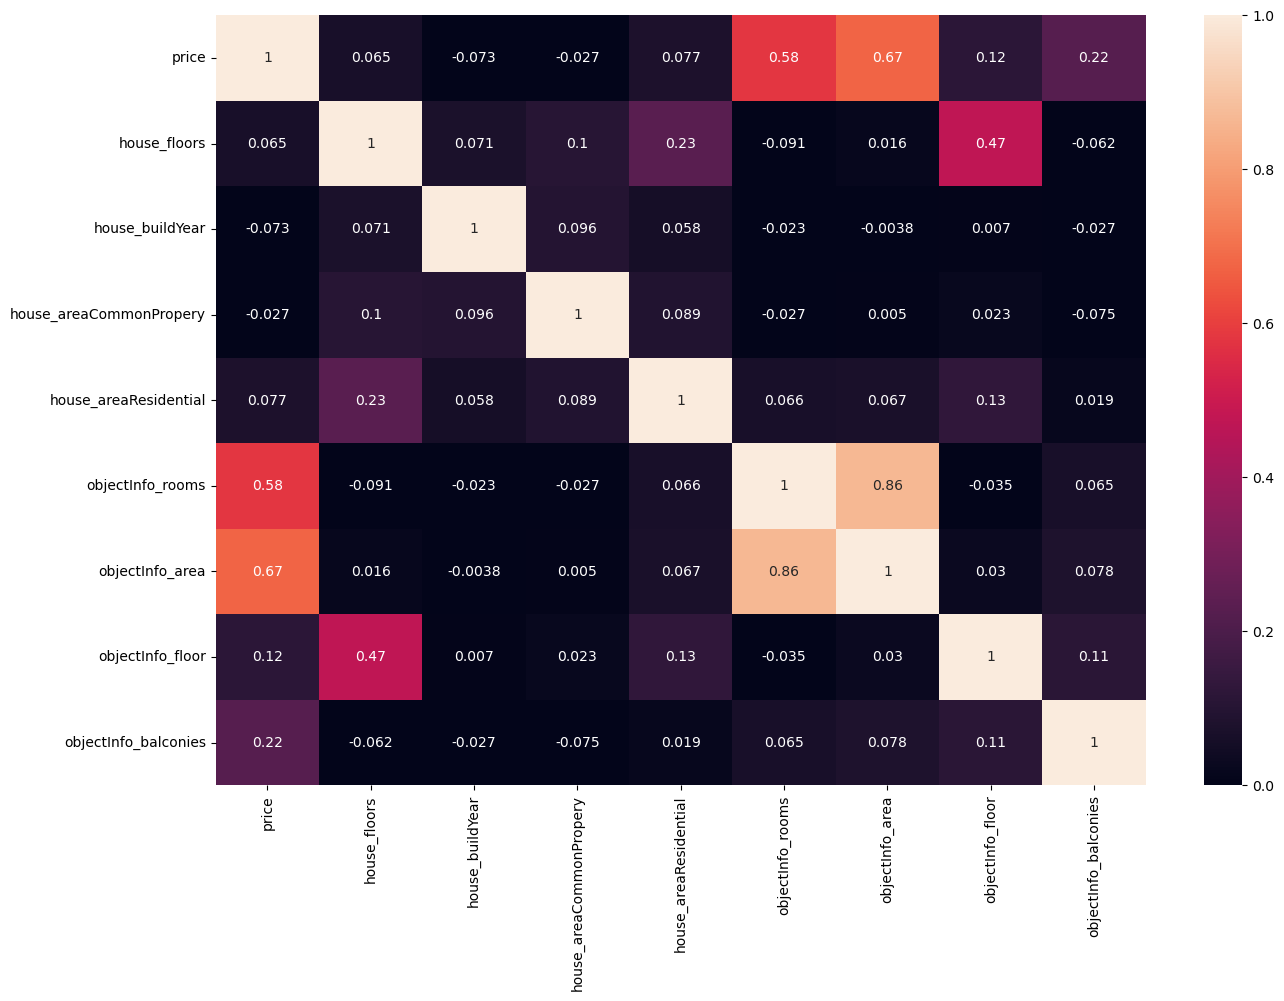

In [266]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_domclick_clean[num_cols_domclick].corr(numeric_only= False), vmin=0, vmax=1, annot = True)

In [235]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_cian_clean[num_cols_cian].corr(numeric_only= False), vmin=0, vmax=1, annot = True)

ValueError: could not convert string to float: '1\xa0250\xa0000\xa0₽'

<Axes: >

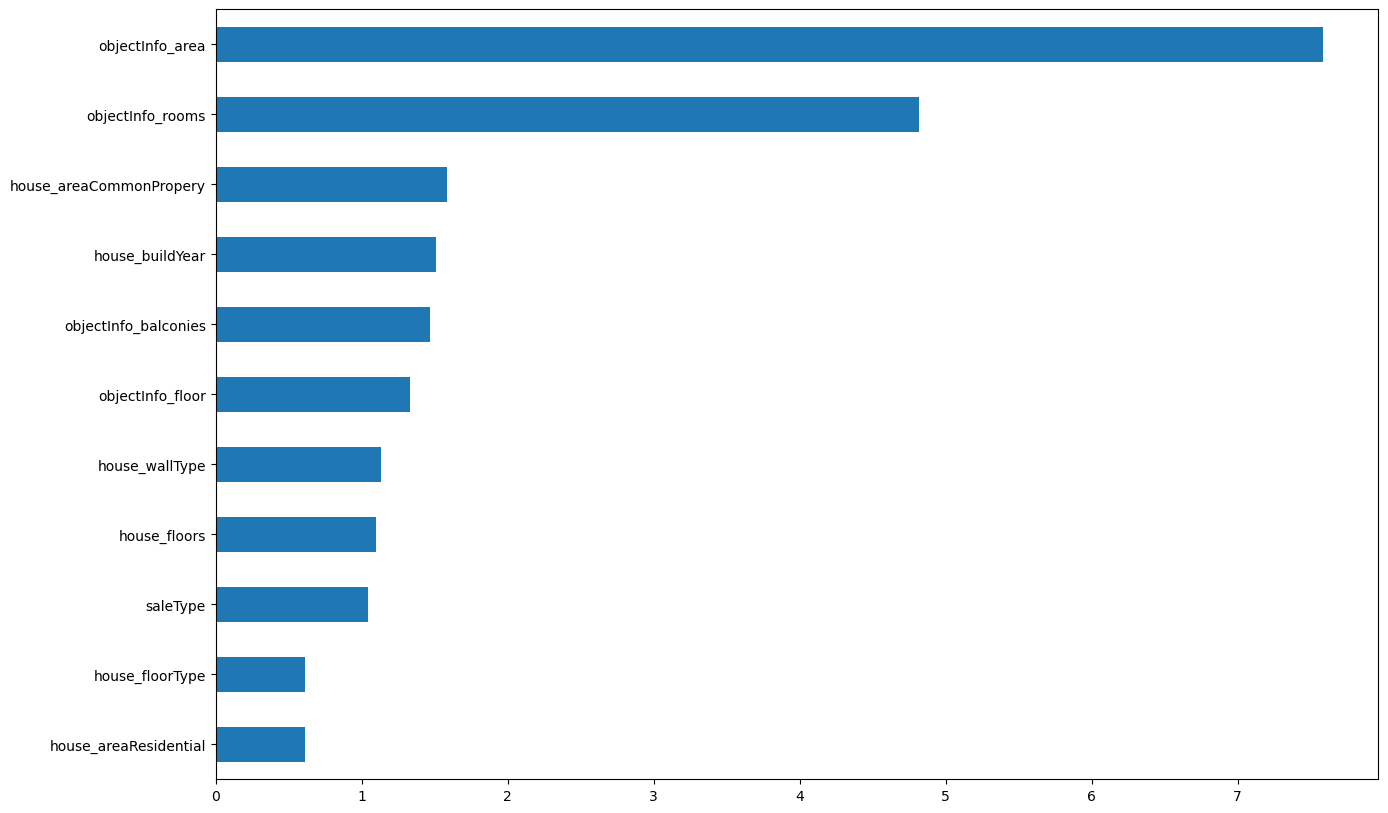

In [263]:
imp_num = pd.Series(f_classif(df_domclick_clean[num_cols_domclick + cat_cols_domclick], df_domclick_clean['price'])[0], index = num_cols_domclick + cat_cols_domclick)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [ ]:
imp_num = pd.Series(f_classif(df_cian_clean[num_cols_cian], df_cian_clean['price'])[0], index = num_cols_cian)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')